In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
plt.rcParams['svg.fonttype'] = 'none'

def getkfunc(s0,eta,P):
    def func_root(ka):
        return s0 + np.sum((ka*eta)/(ka+P*eta)) - ka
    return func_root

def getgam(eta,P,ka):
    return np.sum(P*np.square(eta)/np.square(ka+P*eta))

N=100
P=10
alpha=P/N

s0=0

scalef=0.1
np.random.seed()
eta=np.sort(np.abs(np.random.randn(N)))[::-1]#np.ones(N)
eta=eta-eta[-1]
eta=eta/eta[0]
eta=1+(eta-1)*scalef

func_root=getkfunc(0,np.array(eta),P)
ka=fsolve(func_root,(N-P))
gam=getgam(eta,P,ka)
Erhos=1/(1-gam) *  (ka**2)/(np.square(ka + P*eta ))

Erhots=(1-alpha)*( 1-2*( (eta-1) - np.mean(eta-1)  )*alpha )



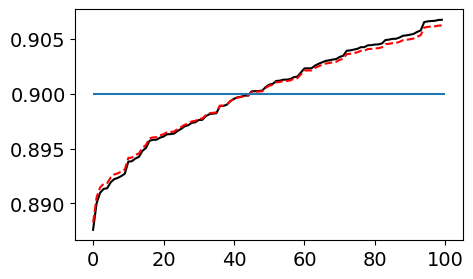

In [2]:
fig,ax=plt.subplots(1,1,figsize=(5,3))
ax.plot(Erhos,c='k')
ax.plot(Erhots,'r--')
ax.hlines((1-alpha),0,N)

#ax.scatter(Erhos,Erhots)


In [3]:
np.random.seed(0)

N=100
P=50
alpha=P/N

eta_rand=[]
Ers_rand=[]
Erhots_rand=[]
scalefs=np.linspace(1e-2,0.5,5)
for scalef in scalefs:
    eta=np.sort(np.abs(np.random.randn(N)))[::-1]#np.ones(N)
    eta=eta-eta[-1]
    eta=eta/eta[0]
    eta=1+(eta-1)*scalef
    eta_rand.append(eta)

    func_root=getkfunc(0,np.array(eta),P)
    ka=fsolve(func_root,(N-P))
    gam=getgam(eta,P,ka)
    Erhos=1/(1-gam) *  (ka**2)/(np.square(ka + P*eta ))

    eta=eta/np.mean(eta)
    Erhots=(1-alpha)*( 1-2*( (eta-1) - np.mean(eta-1)  )*alpha )

    Ers_rand.append(Erhos)
    Erhots_rand.append(Erhots)

eta_rand=np.array(eta_rand)
Ers_rand=np.array(Ers_rand)
Erhots_rand=np.array(Erhots_rand)


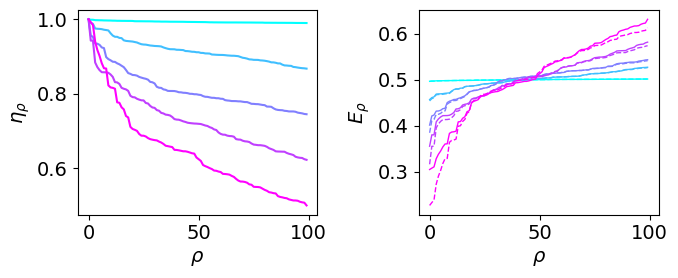

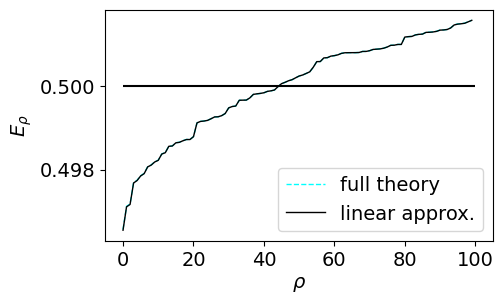

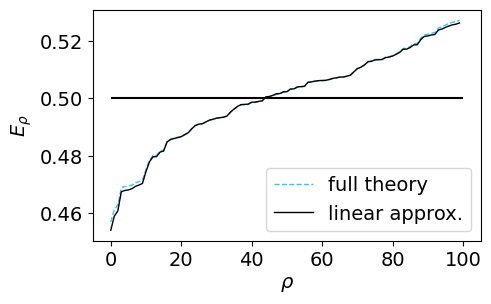

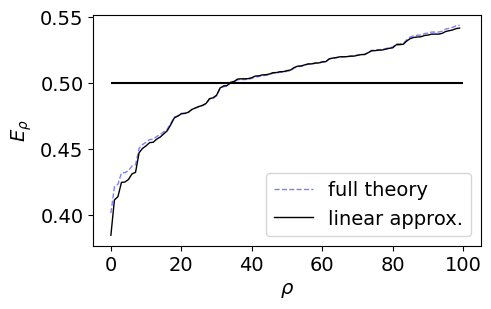

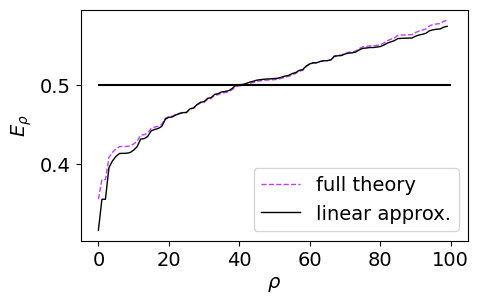

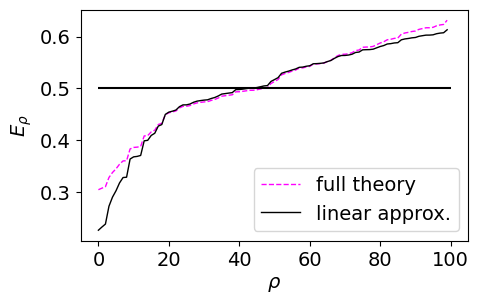

In [16]:
import matplotlib as mpl

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=scalefs.min(), vmax=scalefs.max())
# convert your distances to color coordinates
color_list = cmap(norm(scalefs))

fig,ax=plt.subplots(1,2,figsize=(7,3))
for i,scalef in enumerate(scalefs):
    ax[0].plot(eta_rand[i,:],c=color_list[i])
ax[0].set_ylabel(r'$\eta_\rho$')
ax[0].set_xlabel(r'$\rho$')

#ax.legend()

#fig,ax=plt.subplots(1,1,figsize=(5,4))
for i,scalef in enumerate(scalefs):
    #ax.plot(eta_rand[i,:],c=color_list[i],label=i)
    ax[1].plot(Ers_rand[i,:],c=color_list[i],lw=1)
    ax[1].plot(Erhots_rand[i,:],c=color_list[i],lw=1,linestyle='--')#,markersize=10)
#ax.hlines((1-alpha),0,N,color='k')
ax[1].set_ylabel(r'$E_\rho$')
ax[1].set_xlabel(r'$\rho$')
plt.tight_layout()

for i,scalef in enumerate(scalefs):
    fig,ax=plt.subplots(1,1,figsize=(5,3))
    #ax.plot(eta_rand[i,:],c=color_list[i],label=i)
    ax.plot(Ers_rand[i,:],'--',c=color_list[i],label='full theory',markersize=2,lw=1)
    ax.plot(Erhots_rand[i,:],c='k',label='linear approx.',lw=1)
    ax.hlines((1-alpha),0,N,color='k')
    ax.set_xlabel(r'$\rho$')
    ax.set_ylabel(r'$E_\rho$')
    ax.legend()
    






In [296]:
N=1000
P=80
alpha=P/N

s0=0

#scalef=0.1
#np.random.seed()
#eta=np.sort(np.abs(np.random.randn(N)))[::-1]#np.ones(N)
#eta=eta-eta[-1]
#eta=eta/eta[0]
#eta=1+(eta-1)*scalef

nt=100
firstv=np.linspace(1,100,nt)

Ers=[]
Ert=[]
kas=[]
for e0 in firstv:
    eta=np.ones(N)
    eta[0]=e0
    #eta=eta/np.mean(eta)
    func_root=getkfunc(0,np.array(eta),P)
    ka=fsolve(func_root,(N-P))
    gam=getgam(eta,P,ka)
    Erhos=1/(1-gam) *  (ka**2)/(np.square(ka + P*eta ))
    Ers.append(Erhos)
    
    #eta=np.copy(eta/eta[0])
    #eta=np.copy(eta/np.mean(eta))
    Erhots=(1-alpha)*( 1-2*( (eta-1) - np.mean(eta-1)  )*alpha )
    Ert.append(Erhots)
    kas.append(ka)
Ers=np.array(Ers)
Ert=np.array(Ert)
    

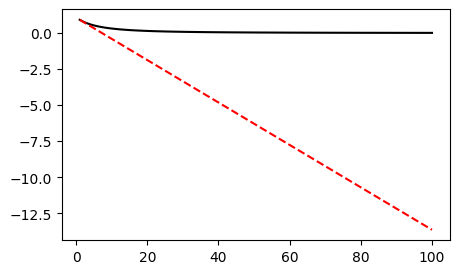

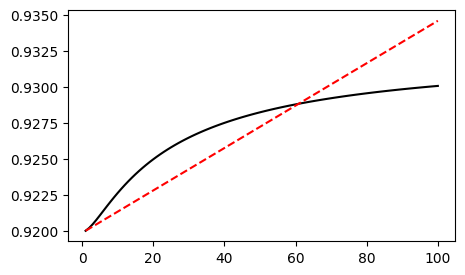

In [297]:
i=-1
fig,ax=plt.subplots(1,1,figsize=(5,3))
ax.plot(firstv,Ers[:,0],c='k')
ax.plot(firstv,Ert[:,0],'r--')
#ax.set_yscale('log')
#ax.set_ylim([0,.1])

fig,ax=plt.subplots(1,1,figsize=(5,3))
ax.plot(firstv,Ers[:,1],c='k')
ax.plot(firstv,Ert[:,1],'r--')


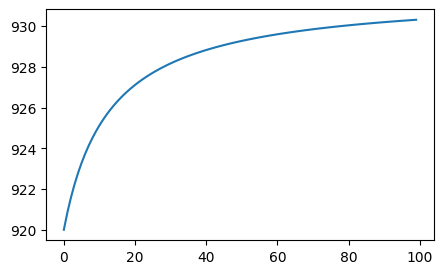

In [298]:
fig,ax=plt.subplots(1,1,figsize=(5,3))
ax.plot(kas)


In [288]:
kas[-1]

array([20.24996055])

In [3]:
import numpy as np
Ps=np.ceil(np.power(10,np.linspace(2,4,6))).astype(int)

print(Ps)

[  100   252   631  1585  3982 10000]


In [ ]:
Ps[:-]